Olá, Renan!

Meu nome é Ramon. Fico feliz em revisar seu projeto. Ao ao longo do texto farei algumas observações sobre melhorias no código e também farei comentários sobre suas percepções sobre o assunto. Estarei aberto a feedbacks e discussões sobre o tema.

**Peço que mantenha e não altere os comentários que eu fizer por aqui para que possamos nos localizar posteriormente, ok?**

Mais uma coisa, vamos utilizar um código de cores para você entender os meus feedbacks no seu notebook. Funciona assim:

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Sucesso. Tudo foi feito corretamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentário do revisor: </b> <a class="tocSkip"></a>

Alerta não crítco, mas que pode ser corrigido para melhoria geral no seu código/análise
</div>

<div class="alert alert-block alert-danger">

<b>Comentário do revisor: </b> <a class="tocSkip"></a>
    
Erro que precisa ser consertado, caso contrário seu projeto **não** será aceito.
</div>

Você pode me responder usando isso:
<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> <a class="tocSkip"></a>
</div>

# Project Description


Você se saiu muito bem no curso do TripleTen e recebeu uma oferta de estágio no departamento analítico da Y.Afisha. Sua primeira tarefa é ajudar a empresa a otimizar suas despesas com marketing.
Você tem:

Logs do servidor com dados sobre os acessos a Y.Afisha de janeiro de 2017 até dezembro de 2018
Arquivo de despejo com todos os pedidos feitos durante o período
Estatísticas de despesas com marketing

Você vai analisar:

Como as pessoas usam o produto
Quando elas começam a comprar
Quanto dinheiro cada cliente traz para a empresa
Quando as despesas serão cobertas

BOA TARDE, GOSTARIA DE SABER COMO ESTA INDO ANTES DE EU ESCREVER A CONCLUSAO, OBRIGADO! TENHO DUAS DUVIDAS ABAIXO

## initializing

In [47]:
# importing libraries

import pandas as pd

import matplotlib.pyplot as plt

import numpy as np


## loading files

In [49]:
# reading files

try:
    costs_us = pd.read_csv("/datasets/costs_us.csv")

except FileNotFoundError:
    costs_us = pd.read_csv("costs_us.csv")

In [50]:
try:
    orders_log = pd.read_csv("/datasets/orders_log_us.csv")

except FileNotFoundError:
    orders_log = pd.read_csv("orders_log_us.csv")

In [51]:
try:
    visits_log = pd.read_csv("/datasets/visits_log_us.csv")

except FileNotFoundError:
    visits_log = pd.read_csv("visits_log_us.csv")

In [52]:
costs_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [53]:
costs_us.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [54]:
# checking for duplicates in 'costs_us'

costs_us.duplicated().value_counts()

False    2542
Name: count, dtype: int64

In [55]:
orders_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [56]:
orders_log.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [57]:
# checking for duplicates in 'orders_log'

orders_log.duplicated().value_counts()

False    50415
Name: count, dtype: int64

In [58]:
visits_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [59]:
visits_log.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [60]:
# checking for duplicates in 'visits_log'

visits_log.duplicated().value_counts()

False    359400
Name: count, dtype: int64

## modifying and standaryzing data

In [62]:
# converting dt to date format

costs_us['dt'] = pd.to_datetime(costs_us['dt'])

In [63]:
# renaming column Buy Ts to buy_ts

orders_log.rename(columns={'Buy Ts': 'buy_ts'}, inplace=True)

In [64]:
# lowering cases on column names

orders_log.columns = orders_log.columns.str.lower()

In [65]:
# converting buy_ts to date format

orders_log['buy_ts'] = pd.to_datetime(orders_log['buy_ts'])

In [66]:
# renaming End Ts, Start Ts and Source Id column names

visits_log.rename(columns={'End Ts':'end_ts', 'Start Ts':'start_ts', 'Source Id':'source_id'}, inplace=True)

In [67]:
# lowering cases on column names

visits_log.columns = visits_log.columns.str.lower()

In [68]:
# converting 'end_ts' to date format

visits_log['end_ts'] = pd.to_datetime(visits_log['end_ts'])

In [69]:
# converting 'start_ts' to date format

visits_log['start_ts'] = pd.to_datetime(visits_log['start_ts'])

## enhancing data

#### orders_log

In [72]:
orders_log.head()

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [73]:
# adding column with day of order

orders_log['order_day'] = orders_log['buy_ts'].dt.day

In [74]:
# adding column with week of order

orders_log['order_week'] = orders_log['buy_ts'].dt.isocalendar().week

In [75]:
# adding column with month of order

orders_log['order_month'] = orders_log['buy_ts'].dt.to_period('M')

In [76]:
# adding column with year of order

orders_log['order_year'] = orders_log['buy_ts'].dt.year

#### visits_log

In [78]:
visits_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  object        
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


In [79]:
visits_log.head()

,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [80]:
# adding column 'time_spent' per visit

visits_log['time_spent'] = (visits_log['end_ts'] - visits_log['start_ts']).dt.seconds

In [81]:
visits_log['visit_day'] = visits_log['start_ts'].dt.day

In [82]:
visits_log['visit_week'] = visits_log['start_ts'].dt.isocalendar().week

In [83]:
visits_log['visit_month'] = visits_log['start_ts'].dt.month

In [84]:
visits_log['visit_year'] = visits_log['start_ts'].dt.year

In [85]:
# merging orders and visits

orders_visits = orders_log.merge(visits_log, on='uid', how='left')

In [86]:
orders_visits.head()

,buy_ts,revenue,uid,order_day,order_week,order_month,order_year,device,end_ts,source_id,start_ts,time_spent,visit_day,visit_week,visit_month,visit_year
0,2017-06-01 00:10:00,17.00,10329302124590727494,1,22,2017-06,2017,desktop,2017-06-01 00:11:00,1,2017-06-01 00:09:00,120,1,22,6,2017
1,2017-06-01 00:25:00,0.55,11627257723692907447,1,22,2017-06,2017,desktop,2017-06-01 00:25:00,2,2017-06-01 00:14:00,660,1,22,6,2017
2,2017-06-01 00:27:00,0.37,17903680561304213844,1,22,2017-06,2017,desktop,2017-06-01 00:34:00,2,2017-06-01 00:25:00,540,1,22,6,2017
3,2017-06-01 00:29:00,0.55,16109239769442553005,1,22,2017-06,2017,desktop,2017-06-01 00:33:00,2,2017-06-01 00:14:00,1140,1,22,6,2017
4,2017-06-01 07:58:00,0.37,14200605875248379450,1,22,2017-06,2017,desktop,2017-06-01 07:59:00,3,2017-06-01 07:31:00,1680,1,22,6,2017


In [87]:
orders_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761807 entries, 0 to 761806
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   buy_ts       761807 non-null  datetime64[ns]
 1   revenue      761807 non-null  float64       
 2   uid          761807 non-null  uint64        
 3   order_day    761807 non-null  int32         
 4   order_week   761807 non-null  UInt32        
 5   order_month  761807 non-null  period[M]     
 6   order_year   761807 non-null  int32         
 7   device       761807 non-null  object        
 8   end_ts       761807 non-null  datetime64[ns]
 9   source_id    761807 non-null  int64         
 10  start_ts     761807 non-null  datetime64[ns]
 11  time_spent   761807 non-null  int32         
 12  visit_day    761807 non-null  int32         
 13  visit_week   761807 non-null  UInt32        
 14  visit_month  761807 non-null  int32         
 15  visit_year   761807 non-null  int3

#### costs_us

In [89]:
costs_us.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [90]:
costs_us['week'] = pd.to_datetime(costs_us['dt']).dt.isocalendar().week

In [91]:
costs_us['month'] = pd.to_datetime(costs_us['dt']).dt.to_period('M')

# Analizing data

## Product



### how many access do we have per day 

In [95]:
visits_log.head()

,device,end_ts,source_id,start_ts,uid,time_spent,visit_day,visit_week,visit_month,visit_year
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,1080,20,51,12,2017
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,1680,19,8,2,2018
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,0,1,26,7,2017
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,1440,20,20,5,2018
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,0,27,52,12,2017


In [96]:
# checking duplicated access by users

visits_log['uid'].duplicated().value_counts()

uid
False    228169
True     131231
Name: count, dtype: int64

In [97]:
# grouping by user visit per day

daily_visits = visits_log.groupby('uid')['start_ts'].nunique().reset_index(name='visits_per_day')

In [98]:
daily_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228169 entries, 0 to 228168
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   uid             228169 non-null  uint64
 1   visits_per_day  228169 non-null  int64 
dtypes: int64(1), uint64(1)
memory usage: 3.5 MB


In [99]:
daily_visits.head()

,uid,visits_per_day
0,11863502262781,1
1,49537067089222,1
2,297729379853735,1
3,313578113262317,3
4,325320750514679,2


In [100]:
# average access per all users

daily_visits['visits_per_day'].mean()

1.5751438626632015

In [101]:
# counting how many users per visits days

users_per_visit_days = daily_visits.groupby('visits_per_day')['uid'].count().reset_index(name='users_count')

In [102]:
users_per_visit_days.head()

,visits_per_day,users_count
0,1,176042
1,2,30925
2,3,10184
3,4,4357
4,5,2283


In [103]:
# calculating percentage of one day visitors over total users

percentage_one_visit_per_day = (users_per_visit_days['users_count'].loc[0] / users_per_visit_days['users_count'].sum() * 100)

In [104]:
percentage_one_visit_per_day

77.15421463914906

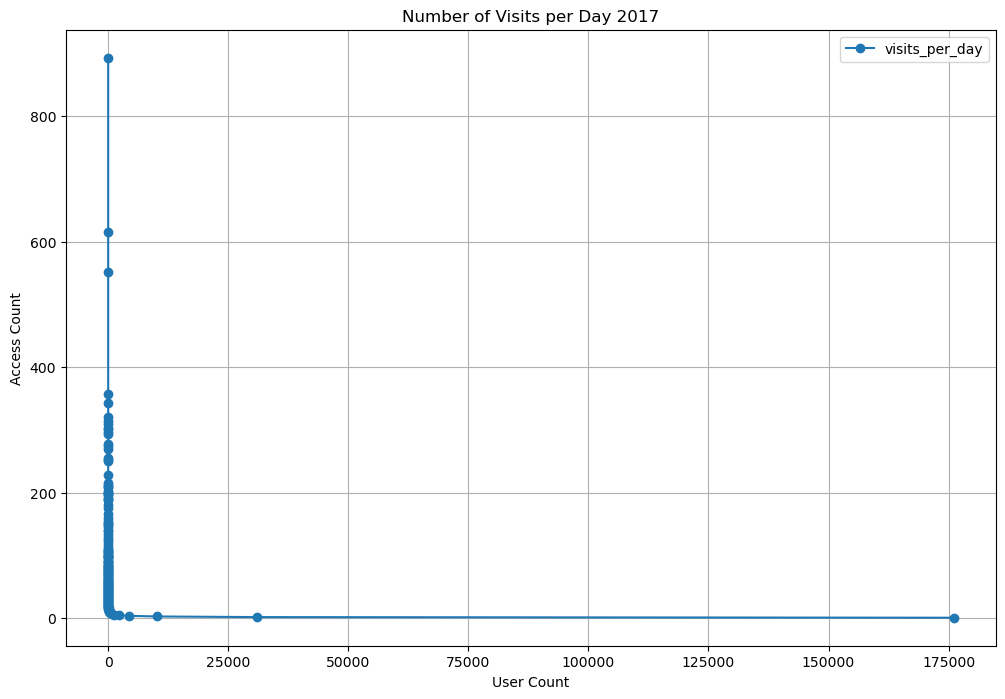

In [105]:
users_per_visit_days.plot(x='users_count', y='visits_per_day', grid='yes', figsize=(12,8), marker='o')
plt.title('Number of Visits per Day 2017')
plt.xlabel('User Count')
plt.ylabel('Access Count')
plt.show()

    77% of the users access only one day

### how many user we have weekly

In [108]:
# checking how many years are in total

visits_log['visit_year'].unique()

array([2017, 2018], dtype=int32)

#### 2017 weeks

In [110]:
# filtering by year 2017

visits_2017 = visits_log.query('visit_year == 2017')

In [111]:
# grouping counting how many access per week

weekly_visits_2017 = visits_2017.groupby('visit_week')['uid'].count().reset_index(name='visits_per_week')

In [112]:
weekly_visits_2017.head()

,visit_week,visits_per_week
0,22,2309
1,23,4931
2,24,3214
3,25,3273
4,26,3514


In [113]:
# calculating percentage of growth on week 22 (1st week we have recored)

(weekly_visits_2017['visits_per_week'].loc[0] / weekly_visits_2017['visits_per_week'].loc[1]) * 100

46.82620158182924

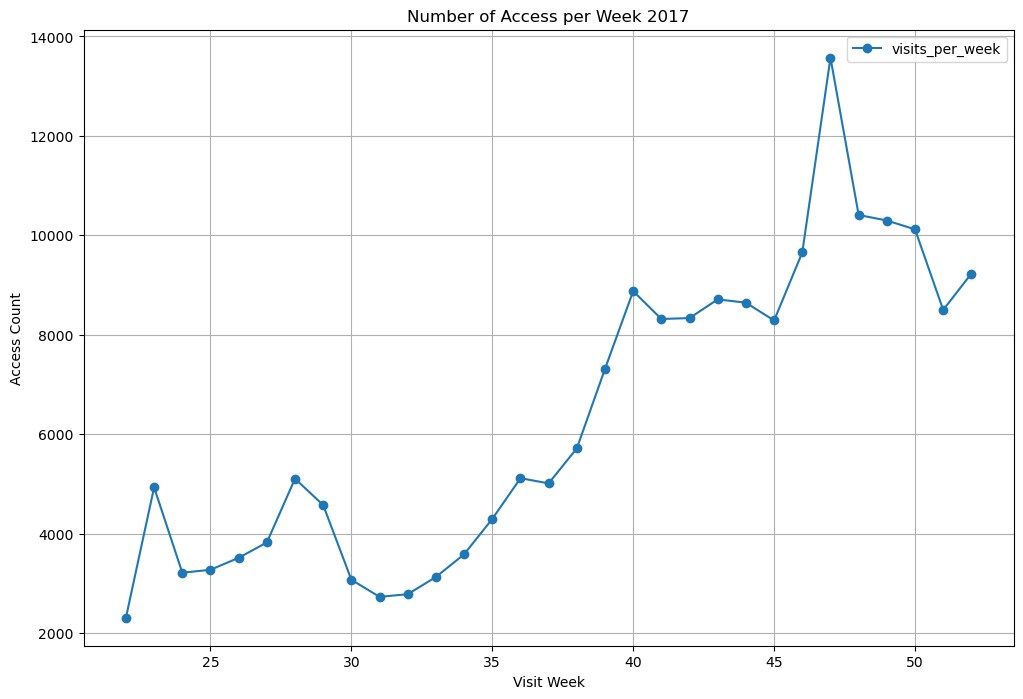

In [114]:
# ploting visits per week 2017

weekly_visits_2017.plot(x='visit_week', y='visits_per_week', grid='yes', figsize=(12,8), marker='o')
plt.title('Number of Access per Week 2017')
plt.xlabel('Visit Week')
plt.ylabel('Access Count')
plt.show()

    we are able to see an increase of 46% from week 22 to 23, after week 31 there is a growth up to week 40 at 8878 access, it stays leveled for 6 weeks and grows again on week 45 peaking at week 47 with 13572 access

#### 2018 weeks

In [117]:
# filtering visits data from 2018

visits_2018 = visits_log.query('visit_year == 2018')

In [118]:
# grouping counting how many access per week

weekly_visits_2018 = visits_2018.groupby('visit_week')['uid'].count().reset_index(name='visits_per_week')

In [119]:
weekly_visits_2018.head()

,visit_week,visits_per_week
0,1,8057
1,2,7871
2,3,8317
3,4,8488
4,5,9796


In [120]:
# shrank percentage from week 12 to 13

(weekly_visits_2018['visits_per_week'].loc[12] / weekly_visits_2018['visits_per_week'].loc[11]) * 100

62.408176301501115

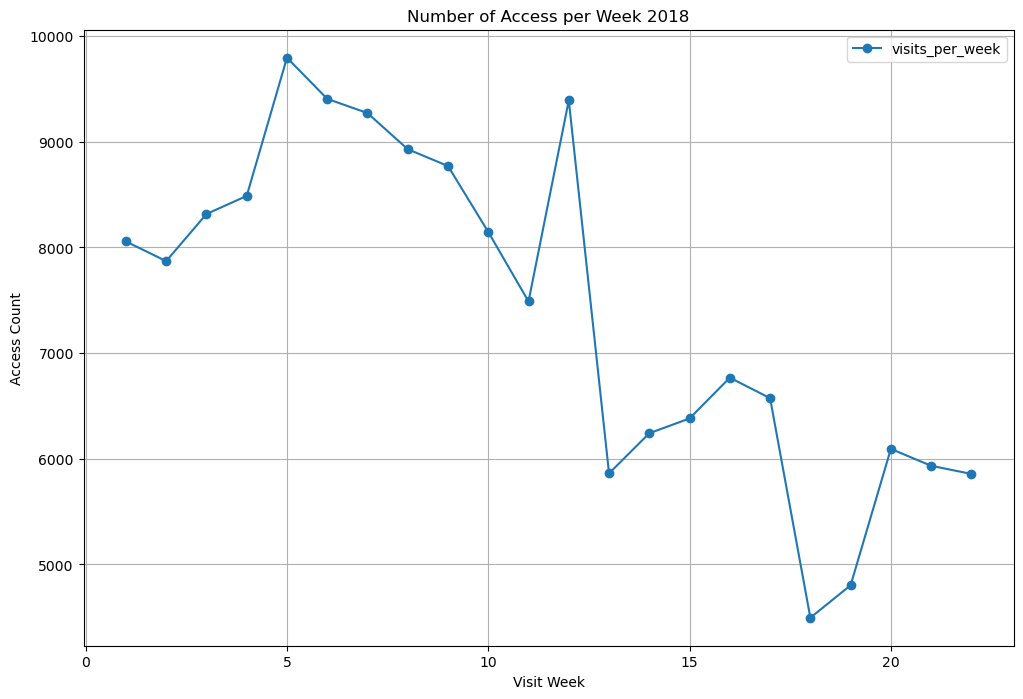

In [121]:
# ploting visits per week 2018

weekly_visits_2018.plot(x='visit_week', y='visits_per_week', grid='yes', figsize=(12,8), marker='o')
plt.title('Number of Access per Week 2018')
plt.xlabel('Visit Week')
plt.ylabel('Access Count')
plt.show()

    on 2018 we can see access peaking at week 5 with 9796 from that until week 11 access went down we see a recovery on week 11 but a diveof 62% of access, a small recovery after 4 weeks and another dive into our lowest level of the recorded year 2018, a very shy recovery after that 

### how many users we have monthly

#### 2017 months

In [125]:
# grouping visitis per month

monthly_visits_2017 = visits_2017.groupby('visit_month')['uid'].nunique().reset_index(name='visits_per_month')

In [126]:
monthly_visits_2017.head(10)

,visit_month,visits_per_month
0,6,13259
1,7,14183
2,8,11631
3,9,18975
4,10,29692
5,11,32797
6,12,31557


In [127]:
# calculating percentage of growth from june to november

((monthly_visits_2017['visits_per_month'].loc[0] - monthly_visits_2017['visits_per_month'].loc[5]) / monthly_visits_2017['visits_per_month'].loc[0]) * 100

-147.3565125575081

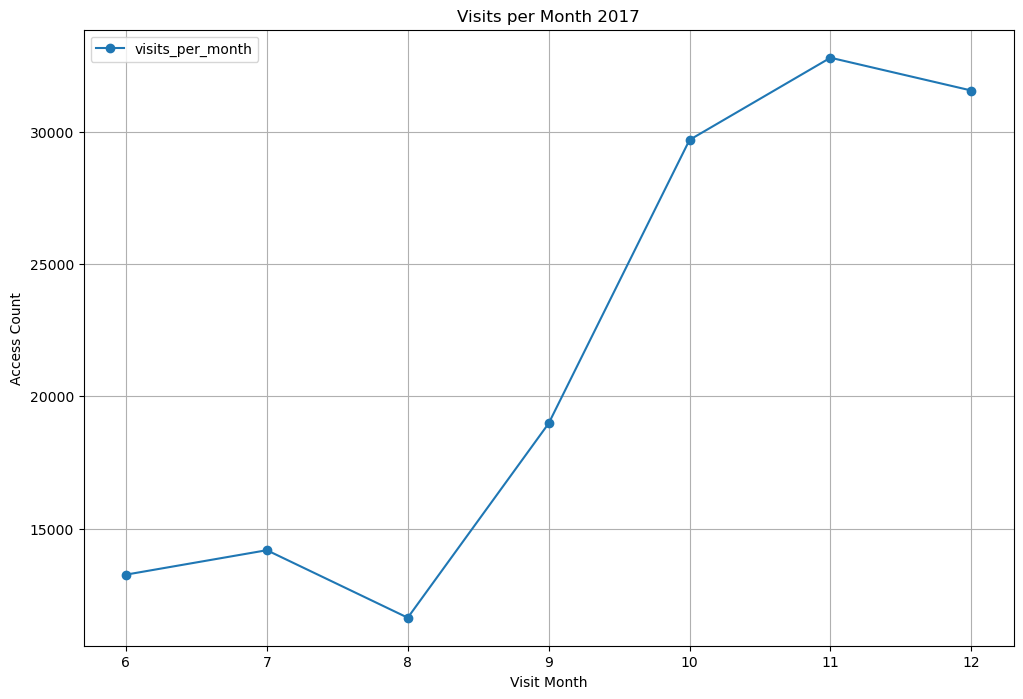

In [128]:
# ploting visits per month graphic

monthly_visits_2017.plot(x='visit_month', y='visits_per_month', figsize=(12,8), grid='yes',marker='o')
plt.title('Visits per Month 2017')
plt.xlabel('Visit Month')
plt.ylabel('Access Count')
plt.show()
          

     we can see a growth of 147% from June to November when it peaks

#### 2018 months

In [131]:
# grouping 2018 monthly visits 

monthly_visits_2018 = visits_2018.groupby('visit_month')['uid'].nunique().reset_index(name='visits_per_month')

In [132]:
monthly_visits_2018.head(10)

,visit_month,visits_per_month
0,1,28716
1,2,28749
2,3,27473
3,4,21008
4,5,20701


In [133]:
# calculating shrank percentage from february to april

((monthly_visits_2018['visits_per_month'].loc[0] - monthly_visits_2018['visits_per_month'].loc[4]) / monthly_visits_2018['visits_per_month'].loc[0]) * 100

27.91126897896643

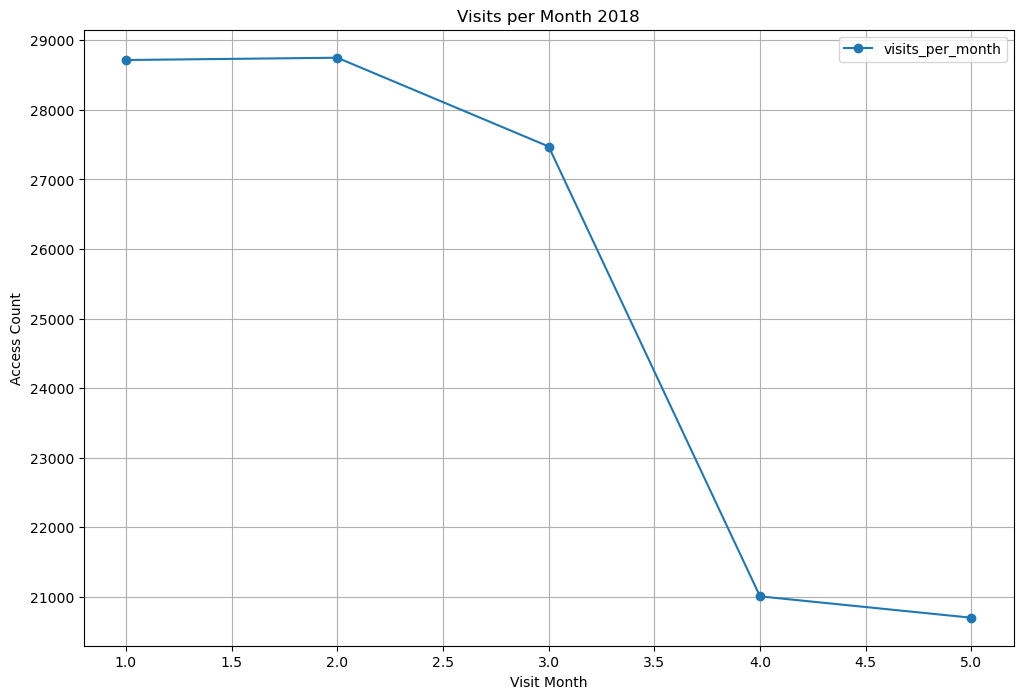

In [134]:
# ploting 2018 monthly visits

monthly_visits_2018.plot(x='visit_month', y='visits_per_month', figsize=(12,8), grid='yes',marker='o')
plt.title('Visits per Month 2018')
plt.xlabel('Visit Month')
plt.ylabel('Access Count')
plt.show()
          

    we noticed a drop of almost 28% from January to May.

### average session length

In [419]:
visits_log.head()

,device,end_ts,source_id,start_ts,uid,time_spent,visit_day,visit_week,visit_month,visit_year
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,1080,20,51,12,2017
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,1680,19,8,2,2018
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,0,1,26,7,2017
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,1440,20,20,5,2018
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,0,27,52,12,2017


In [421]:
# average session lenght

session_length_avg = visits_log['time_spent'].mean()

In [423]:
session_length_avg

643.506488592098

In [425]:
session_length_avg / 60

10.725108143201632

### how often users comeback

In [142]:
orders_log.head()

,buy_ts,revenue,uid,order_day,order_week,order_month,order_year
0,2017-06-01 00:10:00,17.00,10329302124590727494,1,22,2017-06,2017
1,2017-06-01 00:25:00,0.55,11627257723692907447,1,22,2017-06,2017
2,2017-06-01 00:27:00,0.37,17903680561304213844,1,22,2017-06,2017
3,2017-06-01 00:29:00,0.55,16109239769442553005,1,22,2017-06,2017
4,2017-06-01 07:58:00,0.37,14200605875248379450,1,22,2017-06,2017


In [143]:
# grouping users per qty of orders

users_orders = orders_log.groupby('uid')['buy_ts'].nunique().value_counts().reset_index(name='qty_users')

In [144]:
users_orders.head()

,buy_ts,qty_users
0,1,30231
1,2,4395
2,3,1086
3,4,375
4,5,147


In [145]:
# calculating percentage of users thta have only 1 transaction over all them

(users_orders['qty_users'].loc[0] / users_orders['qty_users'].sum()) * 100

82.77249952084988

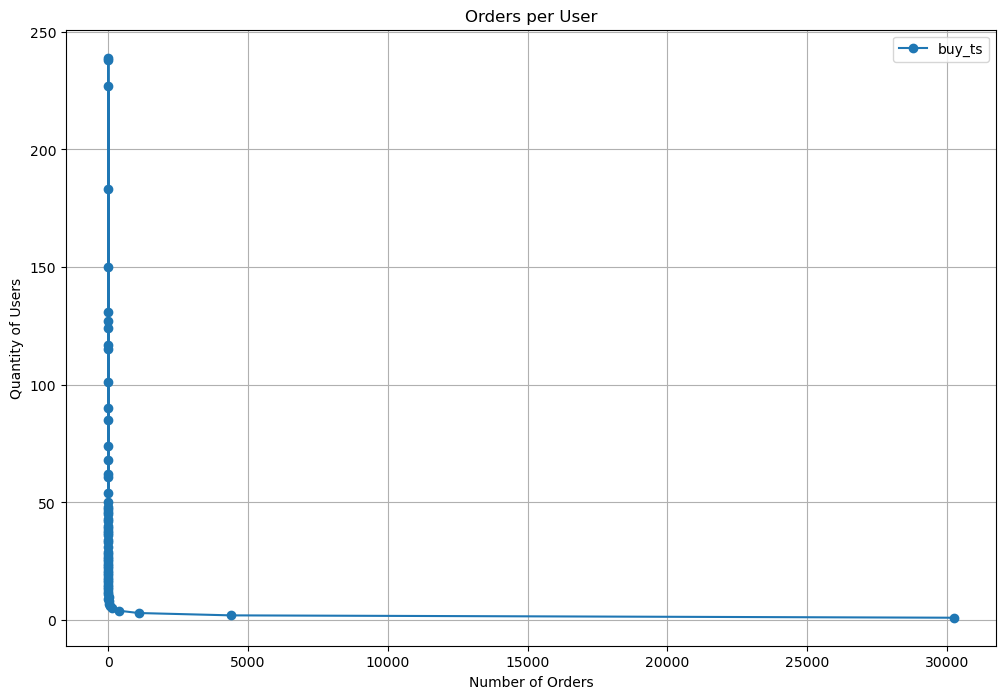

In [146]:
# ploting order per user graphic

users_orders.plot(x='qty_users', y='buy_ts', grid='yes', figsize=(12,8), marker='o')
plt.title('Orders per User')
plt.xlabel('Number of Orders')
plt.ylabel('Quantity of Users')
plt.show()

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Erro que impede correção
</div>


    here we can see that 82% of the users only buy one time 

## Sales

### period between access and buying

In [151]:
# grouping time of first access users 

first_access = visits_log.groupby('uid')['start_ts'].min().reset_index(name='first_access')

In [152]:
first_access

,uid,first_access
0,11863502262781,2018-03-01 17:27:00
1,49537067089222,2018-02-06 15:55:00
2,297729379853735,2017-06-07 18:47:00
3,313578113262317,2017-09-18 22:49:00
4,325320750514679,2017-09-30 14:29:00
...,...,...
228164,18446403737806311543,2017-11-30 03:36:00
228165,18446424184725333426,2017-12-06 20:32:00
228166,18446556406699109058,2018-01-01 16:29:00
228167,18446621818809592527,2017-12-27 13:27:00


In [153]:
# grouping first time user's purchase

first_purchase = orders_log.groupby('uid')['buy_ts'].min().reset_index(name='first_purchase')

In [154]:
first_purchase.head()

,uid,first_purchase
0,313578113262317,2018-01-03 21:51:00
1,1575281904278712,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 18:33:00
3,2464366381792757,2018-01-28 15:54:00
4,2551852515556206,2017-11-24 10:14:00


In [155]:
# merging 'first_access' with 'first_purchase'

first_access_to_purchase = first_access.merge(first_purchase, on='uid')

In [156]:
first_access_to_purchase.head()

,uid,first_access,first_purchase
0,313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 17:14:00,2017-10-11 18:33:00
3,2464366381792757,2018-01-27 20:10:00,2018-01-28 15:54:00
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00


In [157]:
# categorizing time_of_conversion

first_access_to_purchase['time_to_conversion'] = (first_access_to_purchase['first_purchase'] - first_access_to_purchase['first_access']).dt.days

In [158]:
def conversion(time_to_conversion):
    if time_to_conversion <= 0:
        return '0d'    
    if time_to_conversion <= 7:
        return '1 week'
    if time_to_conversion <= 14:
        return '2 weeks'
    if time_to_conversion <= 30:
        return '1 month'
    if time_to_conversion <= 60:
        return '2 months'
    if time_to_conversion >= 90:
        return 'over 3 months'
   

In [159]:
# apply funcition to categorize time_of_conversion

first_access_to_purchase['conversion_category'] = first_access_to_purchase['time_to_conversion'].apply(conversion)

In [160]:
first_access_to_purchase.head()

,uid,first_access,first_purchase,time_to_conversion,conversion_category
0,313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00,106,over 3 months
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00,0,0d
2,2429014661409475,2017-10-11 17:14:00,2017-10-11 18:33:00,0,0d
3,2464366381792757,2018-01-27 20:10:00,2018-01-28 15:54:00,0,0d
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00,0,0d


In [429]:
# average time to conversion

first_access_to_purchase['time_to_conversion'].mean()

16.7298688497659

In [161]:
# grouping users by category

grouped_conversion_category = first_access_to_purchase.groupby('conversion_category')['uid'].count().reset_index().sort_values(by='uid', ascending=False)

In [433]:
grouped_conversion_category.head(10)

,conversion_category,uid
0,0d,26363
2,1 week,3080
5,over 3 months,2663
3,2 months,1356
1,1 month,1250
4,2 weeks,928


In [163]:
# calculatiing percentage of users purchase on first day of access

(grouped_conversion_category['uid'].loc[0] / grouped_conversion_category['uid'].sum()) * 100

73.9702581369248

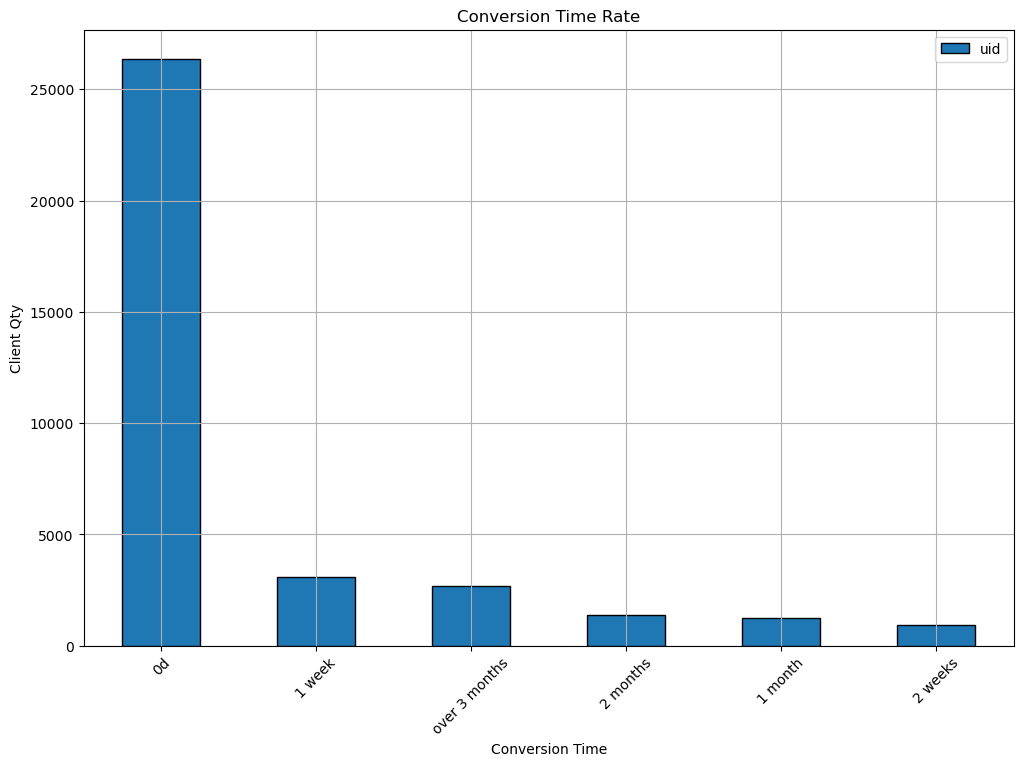

In [164]:
# ploting conversion time rate graphic

grouped_conversion_category.plot(kind='bar', figsize=(12,8),x='conversion_category', y='uid', edgecolor='black',grid='yes')
plt.xticks(rotation=45)
plt.title('Conversion Time Rate')
plt.xlabel('Conversion Time')
plt.ylabel('Client Qty')
plt.show()

    73% of the user purchase on first access time

### How many order client do during a period 

#### weekly sales

In [168]:
# grouping revenue by week

weekly_orders = orders_log.groupby('order_week')['revenue'].sum().reset_index(name='weekly_sales')

In [169]:
weekly_orders.tail()

,order_week,weekly_sales
47,48,5907.96
48,49,11470.93
49,50,8755.03
50,51,6871.31
51,52,6960.25


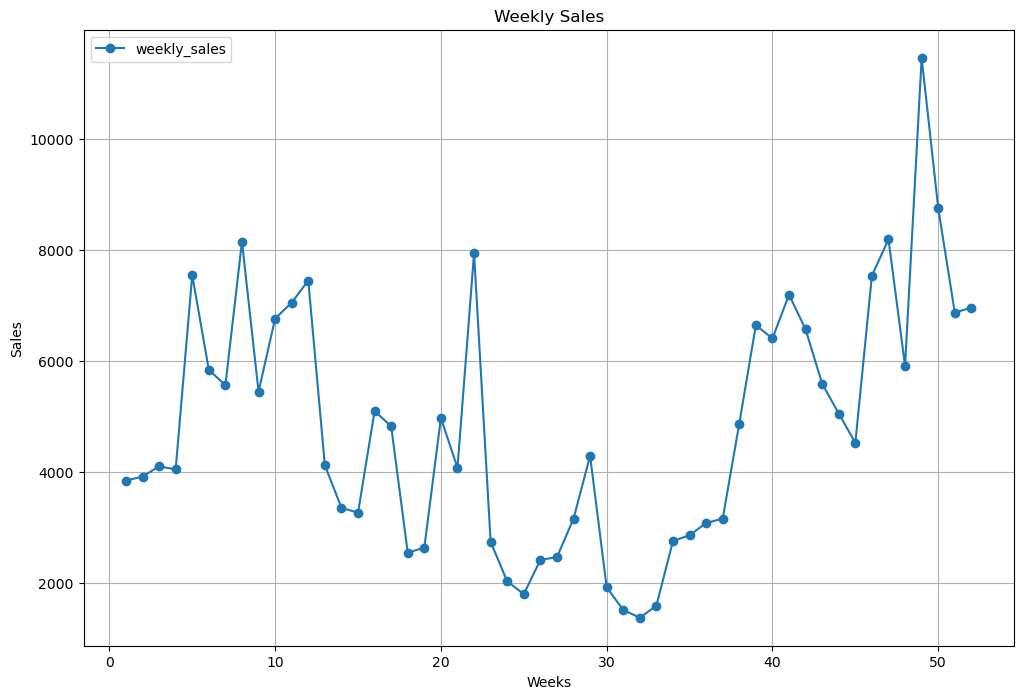

In [170]:
# ploting graphic to shown revenue done on a weekly basis

weekly_orders.plot(x='order_week',y='weekly_sales',figsize=(12,8), grid='yes',marker='o')
plt.title('Weekly Sales')
plt.xlabel('Weeks')
plt.ylabel('Sales')
plt.show()

    here we see the sales through the week, we see peaking at week 49 at €11470.93

#### monthly sales

In [173]:
monthly_orders = orders_log.groupby('order_month')['revenue'].sum().reset_index(name='monthly_sales')

In [174]:
monthly_orders.head()

,order_month,monthly_sales
0,2017-06,9557.49
1,2017-07,12539.47
2,2017-08,8758.78
3,2017-09,18345.51
4,2017-10,27987.70


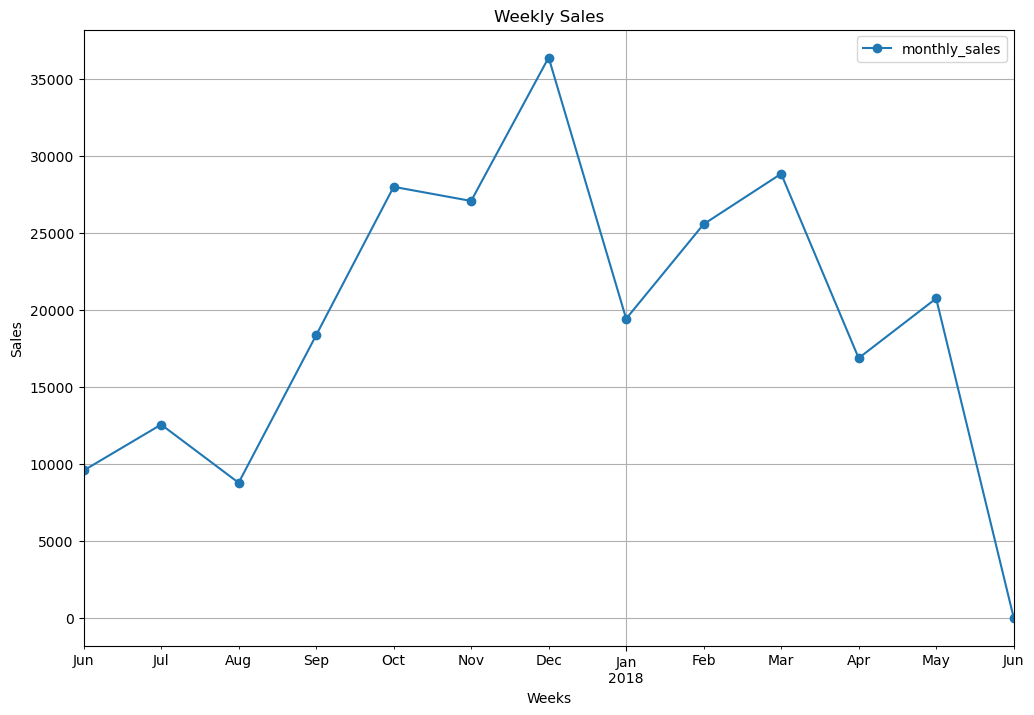

In [175]:
monthly_orders.plot(x='order_month',y='monthly_sales',figsize=(12,8), grid='yes',marker='o')
plt.title('Weekly Sales')
plt.xlabel('Weeks')
plt.ylabel('Sales')
plt.show()

    we see sales with consider growth from august peaking at december

### What is the medium volume of a purchase

In [178]:
# saving total_users variable

total_users = len(np.unique(orders_log['uid']))

In [179]:
total_users

36523

In [180]:
# saving total_revenue variable

total_revenue = orders_log['revenue'].sum()

In [181]:
# calculate average revenue per customer

average_revenue_per_user = (total_revenue / total_users)

In [182]:
average_revenue_per_user.round(3)

6.901

###  What is the Lifetime Value ? 

In [184]:
# grouping last purchase per user

last_purchase = orders_log.groupby('uid')['buy_ts'].max().reset_index(name='last_purchase')

In [185]:
# merging first and last purchase data

first_last_purchase = first_purchase.merge(last_purchase, on='uid')

In [186]:
# calculating churn date in days

first_last_purchase['churn_rate_days'] = (first_last_purchase['last_purchase'] - first_last_purchase['first_purchase']).dt.days

In [187]:
# calculating 'customer_lifespan'

customer_lifespan = (first_last_purchase['churn_rate_days'].sum() / total_users) 

In [188]:
customer_lifespan.round(3)

9.637

In [189]:
customer_lifespan_months = (first_last_purchase['churn_rate_days'].sum() / total_users) / 30

In [190]:
customer_lifespan_months

0.3212386715220546

In [191]:
# calculating LTV in days

ltv_days = (average_revenue_per_user/customer_lifespan)

In [192]:
ltv_days

0.7161163481808522

In [193]:
# calculating LTV in months

ltv_month = (average_revenue_per_user/customer_lifespan_months)

In [453]:
ltv_month.round(2)

21.48

## Marketing

### How much money was spent ? 
   

#### total

In [198]:
# total cost with marketing

total_cost = costs_us['costs'].sum()

In [199]:
total_cost

329131.62

#### per source

In [201]:
# grouping cost by marketing source

cost_per_source = costs_us.groupby('source_id')['costs'].sum().reset_index(name='total_cost')

In [202]:
# sorting values by 'total_cost'

cost_per_source = cost_per_source.sort_values(by='total_cost', ascending=False)

In [460]:
cost_per_source.head()

,source_id,total_cost
2,3,141321.63
3,4,61073.60
4,5,51757.10
1,2,42806.04
0,1,20833.27


In [472]:
(cost_per_source['total_cost'] / cost_per_source['total_cost'].sum()) * 100

2    42.937725
3    18.555981
4    15.725350
1    13.005751
0     6.329769
6     1.769046
5     1.676378
Name: total_cost, dtype: float64

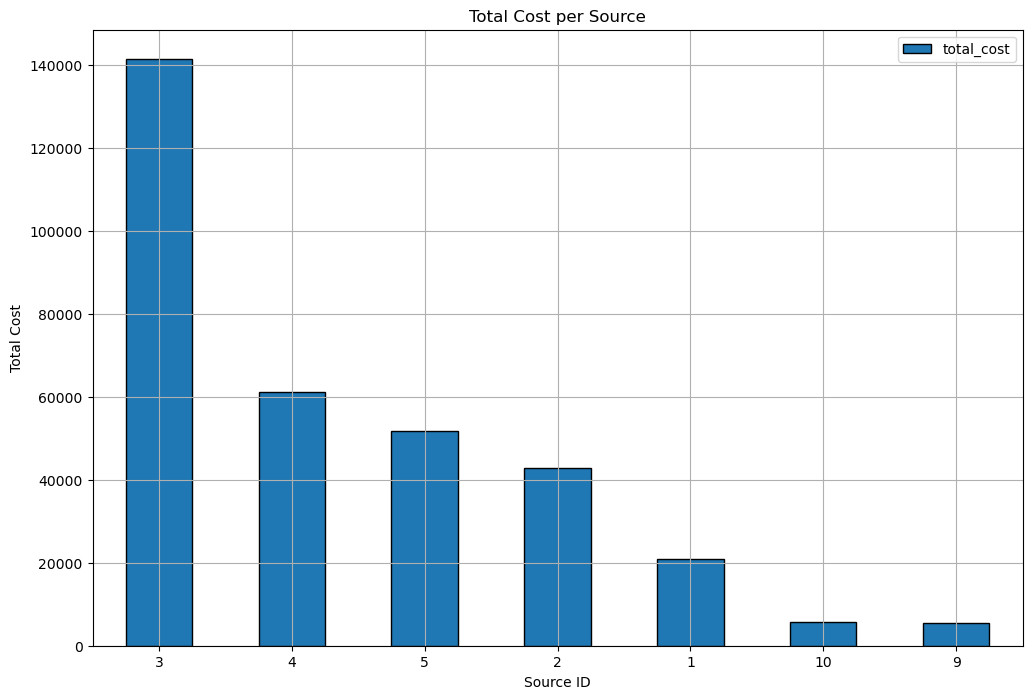

In [203]:
# ploting total cost per source graphic

cost_per_source.plot(x='source_id',y='total_cost',kind='bar', figsize=(12,8), edgecolor='black',grid='yes')
plt.xticks(rotation=0)
plt.title('Total Cost per Source')
plt.xlabel('Source ID')
plt.ylabel('Total Cost')
plt.show()

    we see almost 43% of the marketing cost was from source 3

#### during a period of time 

In [205]:
costs_us.head()

,source_id,dt,costs,week,month
0,1,2017-06-01,75.20,22,2017-06
1,1,2017-06-02,62.25,22,2017-06
2,1,2017-06-03,36.53,22,2017-06
3,1,2017-06-04,55.00,22,2017-06
4,1,2017-06-05,57.08,23,2017-06


In [206]:
# grouping cost of marketing source per week

weekly_costs = costs_us.groupby('week')['costs'].sum().reset_index(name='weekly_cost')

In [207]:
weekly_costs.head()

,week,weekly_cost
0,1,8067.81
1,2,6855.05
2,3,7913.74
3,4,7174.12
4,5,8130.57


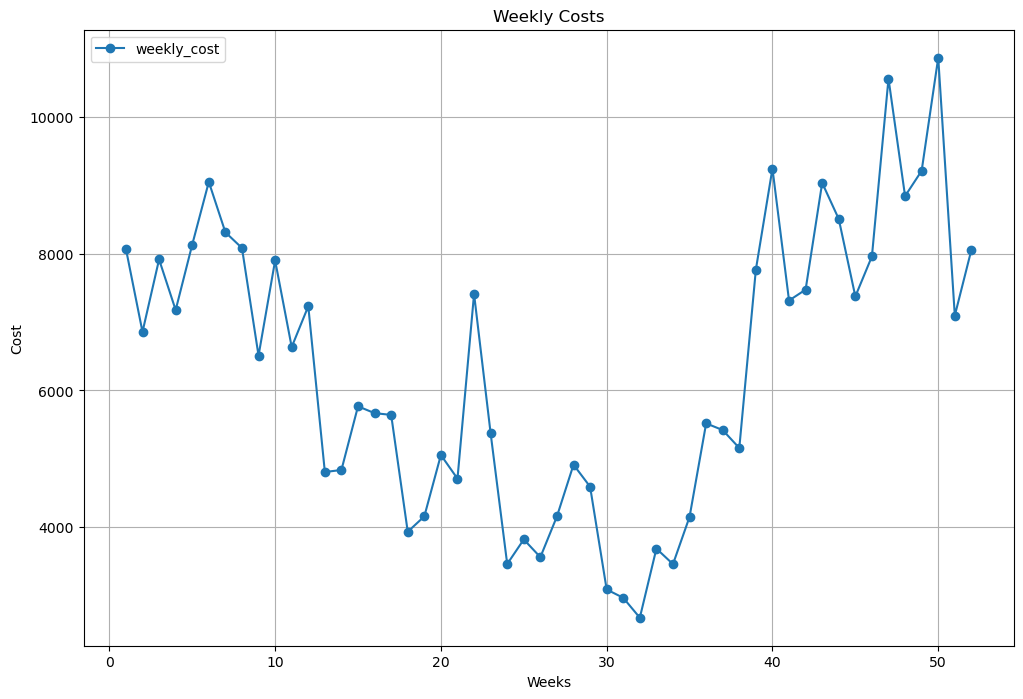

In [208]:
# ploting graphic of marketing costs per week

weekly_costs.plot(x='week',y='weekly_cost',figsize=(12,8), grid='yes',marker='o')
plt.title('Weekly Costs')
plt.xlabel('Weeks')
plt.ylabel('Cost')
plt.show()

    as seen in graphic we see a peak of costs on week 50

In [210]:
# grouping marketing costs per month

monthly_costs = costs_us.groupby('month')['costs'].sum().reset_index(name='monthly_cost')

In [486]:
monthly_costs.head(10)

,month,monthly_cost
0,2017-06,18015.00
1,2017-07,18240.59
2,2017-08,14790.54
3,2017-09,24368.91
4,2017-10,36322.88
5,2017-11,37907.88
6,2017-12,38315.35
7,2018-01,33518.52
8,2018-02,32723.03
9,2018-03,30415.27


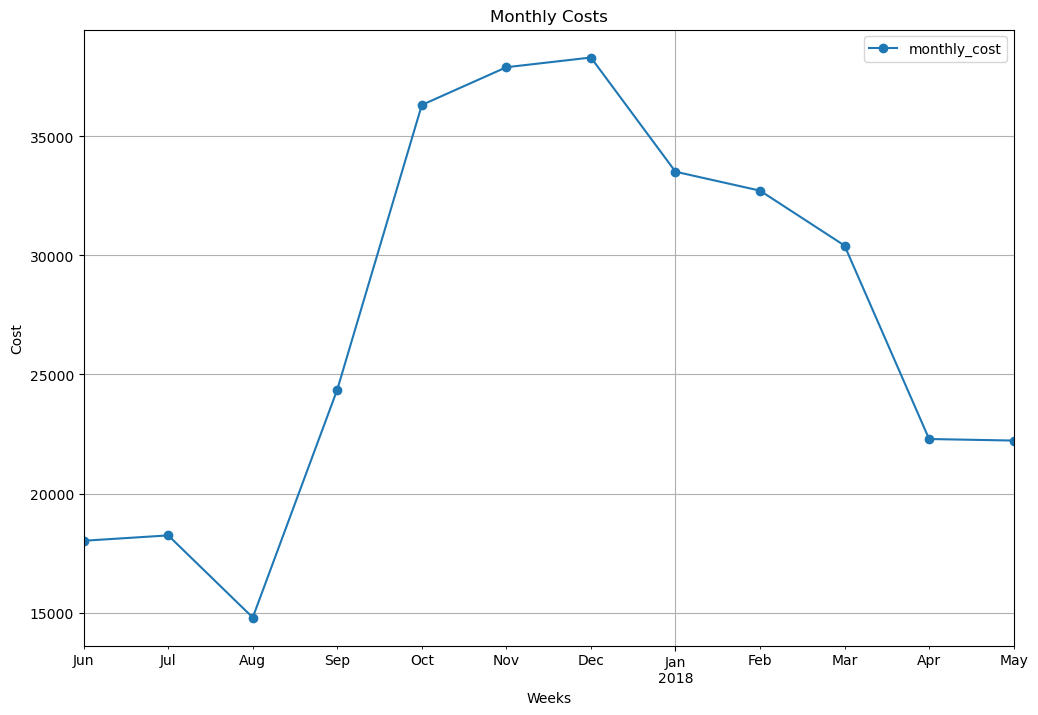

In [212]:
# ploting marketing costs per month

monthly_costs.plot(x='month',y='monthly_cost',figsize=(12,8), grid='yes',marker='o')
plt.title('Monthly Costs')
plt.xlabel('Weeks')
plt.ylabel('Cost')
plt.show()

    we see a peak in costs again in December with € 38,315.35

### CAC per source

In [215]:
cost_per_source.head()

,source_id,total_cost
2,3,141321.63
3,4,61073.60
4,5,51757.10
1,2,42806.04
0,1,20833.27


In [216]:
# grouping visits per marketing source

visits_per_source = visits_log.groupby('source_id')['uid'].nunique().reset_index(name='uid_per_source')

In [217]:
visits_per_source

,source_id,uid_per_source
0,1,18999
1,2,26245
2,3,74756
3,4,83525
4,5,56974
5,6,6
6,7,34
7,9,9264
8,10,8067


In [218]:
# merging cost per source with visit per source, on source_id

cost_per_visit_source = cost_per_source.merge(visits_per_source, on='source_id')

In [219]:
# sorting cost per visit source

cost_per_visit_source = cost_per_visit_source.sort_values(by='source_id', ascending=True)

In [220]:
cost_per_visit_source

,source_id,total_cost,uid_per_source
4,1,20833.27,18999
3,2,42806.04,26245
0,3,141321.63,74756
1,4,61073.60,83525
2,5,51757.10,56974
6,9,5517.49,9264
5,10,5822.49,8067


In [221]:
# calculating cac

cost_per_visit_source['cac'] = cost_per_visit_source['total_cost'] / cost_per_visit_source['uid_per_source']

In [493]:
cost_per_visit_source.sort_values(by='cac', ascending=False)

,source_id,total_cost,uid_per_source,cac
0,3,141321.63,74756,1.890439
3,2,42806.04,26245,1.631017
4,1,20833.27,18999,1.096546
2,5,51757.10,56974,0.908434
1,4,61073.60,83525,0.731201
5,10,5822.49,8067,0.721766
6,9,5517.49,9264,0.595584


In [505]:
# calculating cac per source

((cost_per_visit_source['cac'] / cost_per_visit_source['cac'].sum()) * 100).sort_values(ascending=False)

0    24.956329
3    21.531615
4    14.475875
2    11.992545
1     9.652841
5     9.528287
6     7.862509
Name: cac, dtype: float64

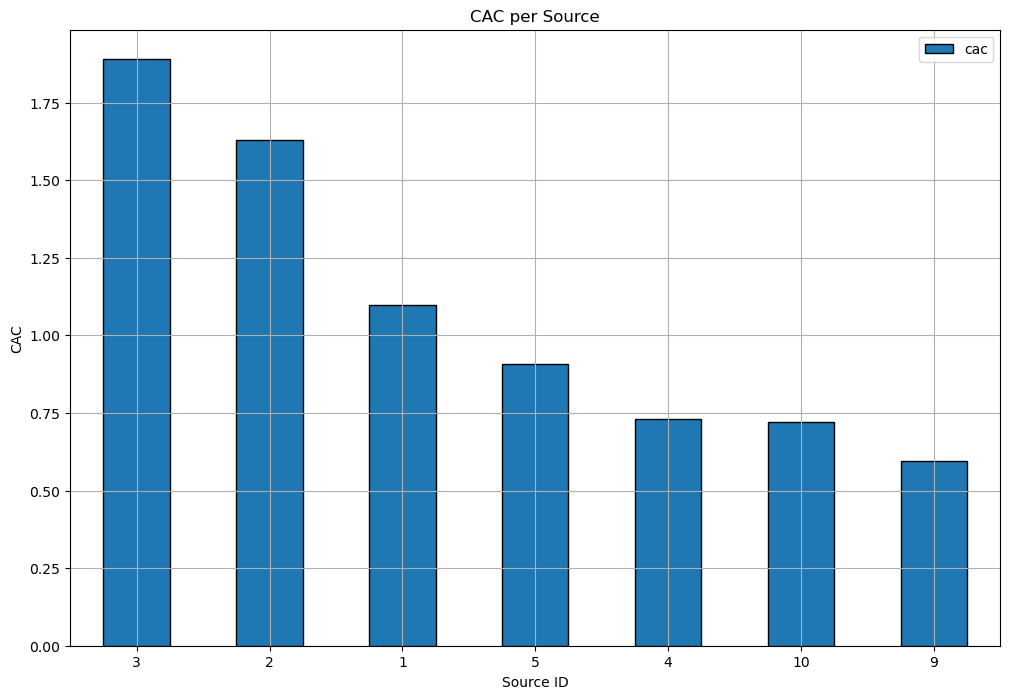

In [495]:
# ploting cac per source

cost_per_visit_source.sort_values(by='cac', ascending=False).plot(kind='bar',x='source_id',y='cac',figsize=(12,8),edgecolor='black',grid='yes')
plt.xticks(rotation=0)
plt.title('CAC per Source')
plt.xlabel('Source ID')
plt.ylabel('CAC')
plt.show()

    the cost per visit source shows source 3 repersents 24% of the total

### marketing revenue x source_id

In [225]:
# revenue x source_id

revenue_source_id = orders_visits.groupby('source_id')['revenue'].sum().reset_index()

In [226]:
# adding difference of percentage when compared with best performed source

max_revenue = revenue_source_id['revenue'].max()
revenue_source_id['percentage_change'] = ((revenue_source_id['revenue'] / max_revenue - 1) * 100)

In [227]:
revenue_source_id.sort_values(by='revenue', ascending=False).head(10)

,source_id,revenue,percentage_change
1,2,2638189.21,0.000000
0,1,2298200.17,-12.887212
4,5,1181477.14,-55.216361
3,4,496690.17,-81.173065
2,3,296687.96,-88.754106
6,9,36342.25,-98.622455
7,10,14619.23,-99.445861
5,7,1.22,-99.999954


In [518]:
((revenue_source_id['revenue'] / revenue_source_id['revenue'].sum()) * 100).sort_values(ascending=False)

1    37.893000
0    33.009648
4    16.969864
3     7.134090
2     4.261407
6     0.521993
7     0.209980
5     0.000018
Name: revenue, dtype: float64

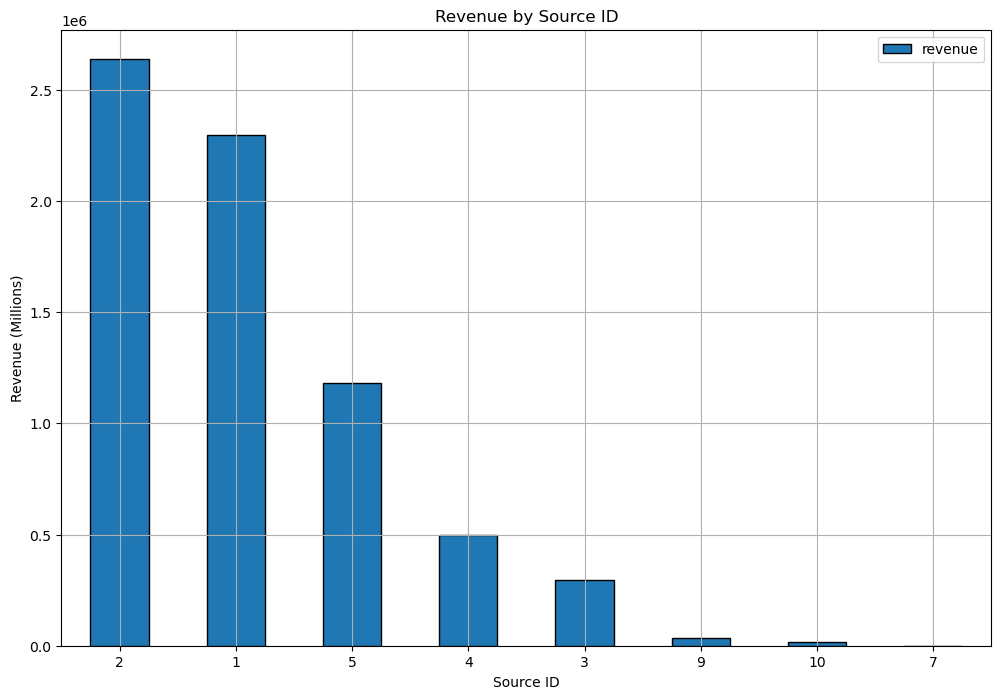

In [228]:
# ploting revenue by source

revenue_source_id.sort_values(by='revenue', ascending=False).plot(kind='bar', figsize=(12,8), x='source_id', y='revenue', grid='yes', edgecolor='black')
plt.title('Revenue by Source ID')
plt.xlabel('Source ID')
plt.ylabel('Revenue (Millions)')
plt.xticks(rotation=0)
plt.show()

    here we can see source 7, 10 and 9 gave very little return, in the other hand source 2 and 1 performed very well. 
    source 1 only 12% under 2 and source 5 down 55% when compared with source 2.

## Device

### time_spent x device

In [232]:
time_spent_device = visits_log.groupby('device')['time_spent'].mean()

In [233]:
time_spent_device

device
desktop    703.946977
touch      479.619407
Name: time_spent, dtype: float64

In [234]:
# calculating percentage of how much more time people spend on desktop over touch

percentage_time_spent_device = ((time_spent_device['desktop'] - time_spent_device['touch']) / time_spent_device['touch']) * 100

In [235]:
percentage_time_spent_device

46.77199622144781

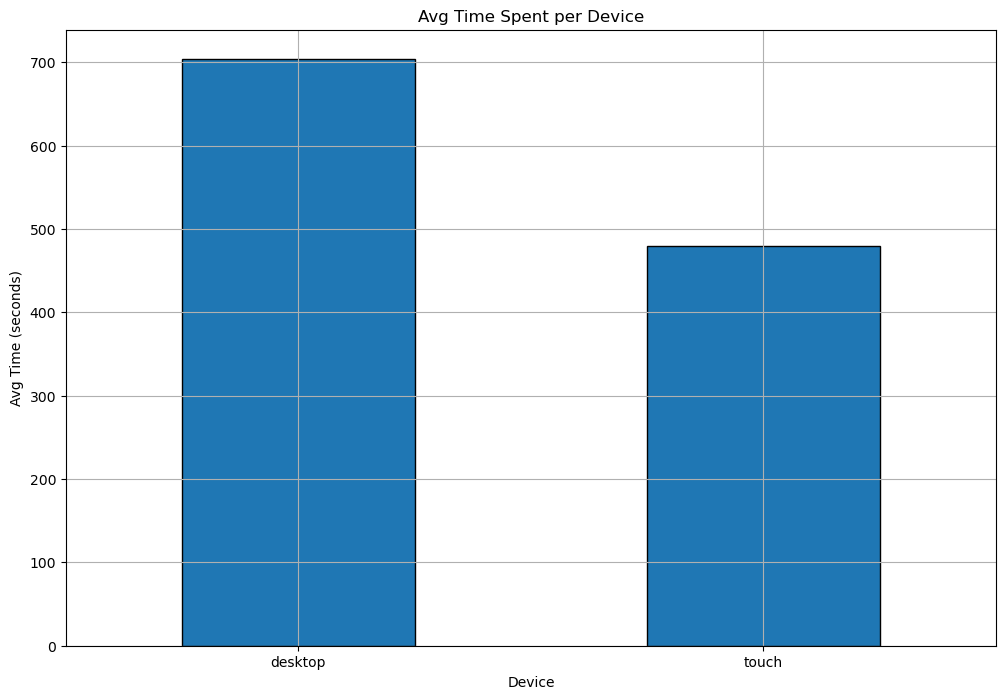

In [236]:
time_spent_device.plot(kind='bar',figsize=(12,8),x=('desktop','touch'), grid='yes', edgecolor='black')
plt.title('Avg Time Spent per Device')
plt.xlabel('Device')
plt.ylabel('Avg Time (seconds)')
plt.xticks(rotation=0)
plt.show()

    users spend 46% more time on desktop than touch

### visits x device

In [239]:
visits_device = visits_log.groupby('device')['uid'].count()

In [240]:
visits_device

device
desktop    262567
touch       96833
Name: uid, dtype: int64

In [241]:
# calculating percentage of how much more people use desktop over touch

percentage_desktop_device = ((visits_device['desktop'] - visits_device['touch']) / visits_device['touch']) * 100

In [242]:
percentage_desktop_device

171.15446180537626

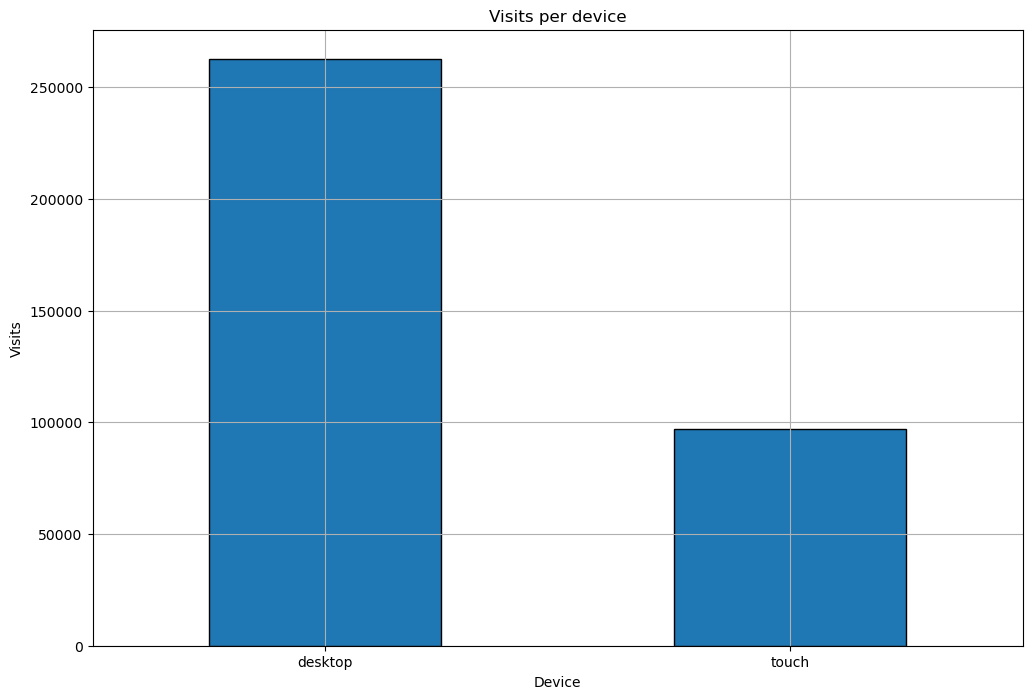

In [243]:
visits_device.plot(kind='bar',figsize=(12,8), grid='yes', edgecolor='black')
plt.title('Visits per device')
plt.xlabel('Device')
plt.ylabel('Visits')
plt.xticks(rotation=0)
plt.show()


    desktop user are 171% more than touch

# Conclusion

The data was loaded normally, we loaded 3 csv files, one with costs spent in marketing, one with visits log and one with the orders log placed by customers. No missing values were detected. We standardized columns names in orders_log and visits_log. Some types of files were managed to facilitate the data analysis, the columns with times and dates were converted to date format. After, we enhance some data creating new columns with the weeks, months and years. Two data frames were merged for analysis as well, orders_log and visits_log.

We started the analysis looking at the product and seeing that the average visit per user a day is around 1.5. We plot a graphic showing us that 77% of the user visit only one time per day. 
I broken down the data in weeks per year. We were able to see an increase of 46% from week 22 to 23, after week 31 there is a growth up to week 40 at 8878 access, it stays leveled for 6 weeks and grows again on week 45 peaking at week 47 with 13572 access in 2017.
In 2018 we can see access peaking at week 5 with 9796 from that until week 11 access went down we see a recovery on week 11 but a dive of 62% of access, a small recovery after 4 weeks and another dive into our lowest level of the recorded year 2018, a very shy recovery after that.
I broken down in months to have a better outlook on the numbers and we could see a growth of 147% from June to November of 2017 when visit peaks. When looking at 2018 data we noticed a drop of almost 28% from January to May.

The average session length per user is 643 seconds which is about 10 minutes. 

I have used a graphic to shown that 82% of users only order once.

I grouped users first access time and subtract from first time they purchase and found that the average time to conversion is 16 days.
I categorized the users conversion rate in 0 days, 1 week, 2 weeks, 1 month, 2 months and over 3 months and as per graphic shown we see that 73% of the users do their purchase on the day of access.

I grouped the revenue by week first and we were able to see its peak on week 49 at € 11,470.93.
I also grouped the revenue by month we see sales with consider growth from august peaking at December. This graphic looks neater than the previous one. When we consider months we can see clearly a growth in sales throughout the year.

We have a total of 36523 users and the average revenue per user is € 6.90.

I calculated the LTV of customer at €21.48

The total money spent with marketing was € 329,131.62.

As seen per data 42% of the marketing cost came from source 3, 18% from source 4, 15 from source 5.

I grouped the marketing costs per week and we observed a peak at week 50.
When marketing costs grouped monthly we seen a growth of costs with source from august peaking at December with € 38,315.35.

I calculated the CAC per source and plotted in a graphic which shows the highist CAC per source being source 3. Representing 24% of the whole cost.

When calculated total revenue by source, source 2 are 37% of the revenue followed by source 1 at 33% and in third source 5 with 16%

A further analysis done by device was done and we found out that by average 46% people spend more time when using desktop as device and 171% use more desktop over touch as a device.

I recommend that marketing department focus their spend with source number 2 as per data shown represent 37% of the revenue and its cost was only € 42,806.04 or 13% of all the cost with marketing. And urgently review their spend at source 3 which cost was €14,1321.63 or 42% of the total spent with marketing and its revenue was €296,687.96 around 12% of total revenue.

